# Decision tree for 0MA+enumeration queries
## PostgreSQL, basic features+POS features

In [1]:
!pip install numpy==1.26.0
!pip install scikit-learn==1.5.0
!pip install statsmodels==0.14.2
!pip install matplotlib==3.9.0
!pip install seaborn==0.13.2
#!pip install torch==1.13.1
#!pip install tqdm==4.66.4
#!pip install dhg==0.9.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 9.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 7.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 KB 8.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [222]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [223]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['figure.dpi'] = 600

### Import the data

In [225]:
file_path = 'results/features_times_POS_extra_full_enum_infos.csv'
df1 = pd.read_csv(file_path)
df1['0ma'] = 0

In [226]:
file_path = 'results/features_times_POS_extra_infos.csv'
df2 = pd.read_csv(file_path)
df2['0ma'] = 1

In [227]:
cols = ['bench', 'query', 'orig/rewr(med)', 'orig(med)', 'rewr(med)',
        '0ma',
       '#relations', '#conditions', '#filters', '#joins', 'total cost',
       'min(table rows)', 'max(table rows)', 'mean(table rows)',
       'q25(table rows)', 'median(table rows)', 'q75(table rows)',
       'min(join rows)', 'max(join rows)', 'mean(join rows)', 'q25(join rows)',
       'median(join rows)', 'q75(join rows)', 'depth', 'min(container counts)',
       'max(container counts)', 'mean(container counts)',
       'q25(container counts)', 'median(container counts)',
       'q75(container counts)', 'min(branching factors)',
       'max(branching factors)', 'mean(branching factors)',
       'median(branching factors)', 'q25(branching factors)',
       'q75(branching factors)']

In [228]:
df1 = df1[cols]
df2 = df2[cols]
df = pd.concat([df1, df2]).reset_index(drop=True)
df.head()

bench                query orig/rewr(med)             orig(med)  \
0  STATS        001-014-full1           orig   0.03788018226623535   
1  STATS        001-014-full2           orig   0.03778505325317383   
2  STATS        001-014-full3           orig  0.038272857666015625   
3  STATS  001-014-augF1-full1           orig   0.03761172294616699   
4  STATS  001-014-augF1-full2           orig   0.03772568702697754   

             rewr(med)  0ma  #relations  #conditions  #filters  #joins  ...  \
0  0.08295345306396484    0           3            7         5       2  ...   
1  0.08245158195495605    0           3            7         5       2  ...   
2  0.08548593521118164    0           3            7         5       2  ...   
3  0.08422040939331055    0           3            7         5       2  ...   
4  0.08310413360595703    0           3            7         5       2  ...   

   mean(container counts)  q25(container counts)  median(container counts)  \
0                1.133333                    1.0                       1.0   
1                1.133333                    1.0                       1.0   
2                1.133333                    1.0                       1.0   
3                1.133333                    1.0                       1.0   
4                1.133333                    1.0                       1.0   

   q75(container counts)  min(branching factors)  max(branching factors)  \
0                    1.0                       2                       2   
1                    1.0                       2                       2   
2                    1.0                       2                       2   
3                    1.0                       2                       2   
4                    1.0                       2                       2   

   mean(branching factors)  median(branching factors) q25(branching factors)  \
0                      2.0                        2.0                    2.0   
1                      2.0                        2.0                    2.0   
2                      2.0                        2.0                    2.0   
3                      2.0                        2.0                    2.0   
4                      2.0                        2.0                    2.0   

   q75(branching factors)  
0                     2.0  
1                     2.0  
2                     2.0  
3                     2.0  
4                     2.0  

[5 rows x 36 columns]

In [229]:
df.shape

(4677, 36)

In [230]:
df.dtypes

bench                         object
query                         object
orig/rewr(med)                object
orig(med)                     object
rewr(med)                     object
0ma                            int64
#relations                     int64
#conditions                    int64
#filters                       int64
#joins                         int64
total cost                   float64
min(table rows)                int64
max(table rows)                int64
mean(table rows)             float64
q25(table rows)              float64
median(table rows)           float64
q75(table rows)              float64
min(join rows)               float64
max(join rows)                object
mean(join rows)              float64
q25(join rows)               float64
median(join rows)            float64
q75(join rows)               float64
depth                          int64
min(container counts)          int64
max(container counts)          int64
mean(container counts)       float64
q

In [231]:
df["max(join rows)"] = df["max(join rows)"].astype(float)

#### Delete those examples, where both methods gave a timeout

In [232]:
df[df["orig/rewr(med)"] == "-"]

bench                query orig/rewr(med) orig(med) rewr(med)  0ma  \
1000  STATS  117-114-augF1-full1              -        TO        TO    0   
1001  STATS  117-114-augF1-full2              -        TO        TO    0   
1002  STATS  117-114-augF1-full3              -        TO        TO    0   
1108  STATS  129-140-augF1-full1              -        TO        TO    0   
1109  STATS  129-140-augF1-full2              -        TO        TO    0   
...     ...                  ...            ...       ...       ...  ...   
3856   SNAP    wiki-tree03-augA3              -        TO       NaN    1   
3857   SNAP    wiki-tree03-augA4              -        TO       NaN    1   
3858   SNAP    wiki-tree03-augA5              -        TO       NaN    1   
3859   SNAP    wiki-tree03-augA6              -        TO       NaN    1   
3860   SNAP    wiki-tree03-augA7              -        TO       NaN    1   

      #relations  #conditions  #filters  #joins  ...  mean(container counts)  \
1000           4           12         9       3  ...                1.187500   
1001           4           12         9       3  ...                1.187500   
1002           4           12         9       3  ...                1.187500   
1108           7           18        12       6  ...                1.176471   
1109           7           18        12       6  ...                1.176471   
...          ...          ...       ...     ...  ...                     ...   
3856           8            7         0       7  ...                1.230769   
3857           8            7         0       7  ...                1.230769   
3858           8            7         0       7  ...                1.230769   
3859           8            7         0       7  ...                1.230769   
3860           8            7         0       7  ...                1.230769   

      q25(container counts)  median(container counts)  q75(container counts)  \
1000                    1.0                       1.0                    1.0   
1001                    1.0                       1.0                    1.0   
1002                    1.0                       1.0                    1.0   
1108                    1.0                       1.0                    1.0   
1109                    1.0                       1.0                    1.0   
...                     ...                       ...                    ...   
3856                    1.0                       1.0                    1.0   
3857                    1.0                       1.0                    1.0   
3858                    1.0                       1.0                    1.0   
3859                    1.0                       1.0                    1.0   
3860                    1.0                       1.0                    1.0   

      min(branching factors)  max(branching factors)  mean(branching factors)  \
1000                       3                       3                     3.00   
1001                       3                       3                     3.00   
1002                       3                       3                     3.00   
1108                       6                       6                     6.00   
1109                       6                       6                     6.00   
...                      ...                     ...                      ...   
3856                       1                       4                     1.75   
3857                       1                       4                     1.75   
3858                       1                       3                     1.75   
3859                       1                       3                     1.75   
3860                       1                       2                     1.75   

      median(branching factors)  q25(branching factors)  \
1000                        3.0                    3.00   
1001                        3.0                    3.00   
1002                 

In [237]:
100* df[(df["orig/rewr(med)"] == "-") & (df["0ma"] == 0)].shape[0] / 10

2310.0

In [238]:
100* df[(df["orig/rewr(med)"] == "-") & (df["0ma"] == 1)].shape[0] / 10

380.0

Some queries did not finish the evaluation within our timeout (100 sec). Therefore, we cannot conclude which variante is the better one and we delete those samples.

In cases where only one of the versions is giving a timeout, we set it the runtime to 100 to be able to work with them.

In [152]:
df = df[df["orig/rewr(med)"] != "-"]
df.shape

(4408, 36)

In [153]:
df[df["orig(med)"] == "TO"].shape

(256, 36)

In [154]:
df['orig(med)'] = df['orig(med)'].replace("TO", 100)

In [155]:
df[df["rewr(med)"] == "TO"].shape

(4, 36)

In [156]:
df['rewr(med)'] = df['rewr(med)'].replace("TO", 100)

In [157]:
df["orig(med)"] = df["orig(med)"].astype(float)

In [158]:
df["rewr(med)"] = df["rewr(med)"].astype(float)

In [212]:
df.loc[df['0ma'] == 0]['orig(med)'].sum()

4716.158988237381

In [214]:
df.loc[df['0ma'] == 1]['orig(med)'].sum()

35538.677366256714

#### Get the feature matrix

Get the features matrix X and the response variables y1 and y1, where once the rewritting time and the evaluation time are taken into consideration and once only the evaluation time. Additionally the response variables have to have numbers in it and we assign 1 = rewr and 0 = orig.

In [159]:
X = df.iloc[:, 5:]
X.head()

0ma  #relations  #conditions  #filters  #joins  total cost  \
0    0           3            7         5       2    11475.41   
1    0           3            7         5       2    11475.41   
2    0           3            7         5       2    11475.41   
3    0           3            7         5       2    11412.99   
4    0           3            7         5       2    11412.99   

   min(table rows)  max(table rows)  mean(table rows)  q25(table rows)  ...  \
0                1           168966      56650.666667            493.0  ...   
1                1           168966      56650.666667            493.0  ...   
2                1           168966      56650.666667            493.0  ...   
3                1           168966      56588.333333            399.5  ...   
4                1           168966      56588.333333            399.5  ...   

   mean(container counts)  q25(container counts)  median(container counts)  \
0                1.133333                    1.0                       1.0   
1                1.133333                    1.0                       1.0   
2                1.133333                    1.0                       1.0   
3                1.133333                    1.0                       1.0   
4                1.133333                    1.0                       1.0   

   q75(container counts)  min(branching factors)  max(branching factors)  \
0                    1.0                       2                       2   
1                    1.0                       2                       2   
2                    1.0                       2                       2   
3                    1.0                       2                       2   
4                    1.0                       2                       2   

   mean(branching factors)  median(branching factors)  q25(branching factors)  \
0                      2.0                        2.0                     2.0   
1                      2.0                        2.0                     2.0   
2                      2.0                        2.0                     2.0   
3                      2.0                        2.0                     2.0   
4                      2.0                        2.0                     2.0   

   q75(branching factors)  
0                     2.0  
1                     2.0  
2                     2.0  
3                     2.0  
4                     2.0  

[5 rows x 31 columns]

#### Log-transformations

This basic features do not need log transformations.

In [160]:
min_values = X.min()
max_values = X.max()
diff = max_values-min_values

pd.DataFrame({'Min': min_values, 'Max': max_values, 'Diff': diff})

Min           Max          Diff
0ma                          0.000000  1.000000e+00  1.000000e+00
#relations                   2.000000  1.100000e+01  9.000000e+00
#conditions                  2.000000  2.000000e+01  1.800000e+01
#filters                     0.000000  1.600000e+01  1.600000e+01
#joins                       1.000000  1.200000e+01  1.100000e+01
total cost                 197.890000  1.841784e+17  1.841784e+17
min(table rows)              1.000000  1.187967e+07  1.187967e+07
max(table rows)             19.000000  2.851121e+07  2.851119e+07
mean(table rows)             4.600000  2.573929e+07  2.573928e+07
q25(table rows)              1.000000  2.851121e+07  2.851121e+07
median(table rows)           1.000000  2.851121e+07  2.851121e+07
q75(table rows)              1.000000  2.851121e+07  2.851121e+07
min(join rows)               1.000000  4.802314e+10  4.802314e+10
max(join rows)               2.000000  1.227856e+19  1.227856e+19
mean(join rows)              1.200000  4.092854e+18  4.092854e+18
q25(join rows)               1.000000  8.913309e+10  8.913309e+10
median(join rows)            1.000000  3.504115e+11  3.504115e+11
q75(join rows)               1.000000  6.139280e+18  6.139280e+18
depth                        1.000000  7.000000e+00  6.000000e+00
min(container counts)        1.000000  1.000000e+00  0.000000e+00
max(container counts)        2.000000  5.000000e+00  3.000000e+00
mean(container counts)       1.047619  1.600000e+00  5.523810e-01
q25(container counts)        1.000000  1.000000e+00  0.000000e+00
median(container counts)     1.000000  1.000000e+00  0.000000e+00
q75(container counts)        1.000000  1.500000e+00  5.000000e-01
min(branching factors)       1.000000  6.000000e+00  5.000000e+00
max(branching factors)       1.000000  6.000000e+00  5.000000e+00
mean(branching factors)      1.000000  6.000000e+00  5.000000e+00
median(branching factors)    1.000000  6.000000e+00  5.000000e+00
q25(branching factors)       1.000000  6.000000e+00  5.000000e+00
q75(branching factors)       1.000000  6.000000e+00  5.000000e+00

In [161]:
X.hist(layout=(11, 3), figsize=(20, 25))
plt.show()

#### Classification response

Get the column(s) where we have "orig" or "rewr", depending on which method was faster. We now want to encode this as 0 (evaluating the original query faster) and 1 (evaluating the rewritten query faster).

In [162]:
mapping = {'orig': 0, 'rewr': 1}
y1 = df['orig/rewr(med)'].map(mapping)
#y1.head()

The number of appearances of original and rewritten is very balanced.

In [163]:
y1.value_counts()

orig/rewr(med)
0    2648
1    1760
Name: count, dtype: int64

In [164]:
count = y1.value_counts().tolist()[::-1] + ["-"]
count = pd.Series(count)
count.index = ["rewr", "orig", "equal"]
count

rewr     1760
orig     2648
equal       -
dtype: object

In [165]:
df["orig/rewr(med)"].value_counts()

orig/rewr(med)
orig    2648
rewr    1760
Name: count, dtype: int64

#### Train-validation-test split

We split the dataset such that each benchmark dataset is represented in the train and in the test set (stratification). We do a 80% train, 10% validation and 10% test split.

In [166]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=df["bench"], random_state=20)
X_val, X_test, y1_val, y1_test = train_test_split(X_test, y1_test, test_size=0.5, stratify=df.loc[X_test.index]["bench"], random_state=20)

### Facts about the test set and runtime differences

In [167]:
y1_test.value_counts()

orig/rewr(med)
0    262
1    179
Name: count, dtype: int64

In [168]:
#df["diff rewr-orig"] = df["rewr(med)"] - df["orig(med)"]
df["diff rewr-orig"] = np.where(
    df["rewr(med)"] == 100, 100,
    np.where(
        df["orig(med)"] == 100, -100, 
        df["rewr(med)"] - df["orig(med)"] 
    )
)

### Train + test set

In [169]:
diff_rewr = df.loc[df["diff rewr-orig"] < 0]
diff_orig = df.loc[df["diff rewr-orig"] >= 0]

In [170]:
bins = [0, 0.01, 0.1, 1, 10, 99.99, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']

diff_rewr["cut"] = pd.cut(abs(diff_rewr["diff rewr-orig"]), bins=bins, labels=labels)
diff_orig["cut"] = pd.cut(abs(diff_orig["diff rewr-orig"]), bins=bins, labels=labels)

table_rewr = diff_rewr.groupby('cut').size().reset_index(name = "rewr")
table_orig = diff_orig.groupby('cut').size().reset_index(name = "orig")

table = pd.merge(table_rewr, table_orig, on='cut', how='outer')
table = table.set_index('cut').T
#table.index = ['FP', 'FN']
table

/tmp/ipykernel_132/1750407932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_rewr["cut"] = pd.cut(abs(diff_rewr["diff rewr-orig"]), bins=bins, labels=labels)
/tmp/ipykernel_132/1750407932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_orig["cut"] = pd.cut(abs(diff_orig["diff rewr-orig"]), bins=bins, labels=labels)
/tmp/ipykernel_132/1750407932.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

cut   0.01  0.1     1   10  100   TO
rewr    52  262   513  440  237  256
orig   118  831  1388  218   84    4

### Test set

In [171]:
diff_rewr = df.loc[y1_test[y1_test == 1].index]
diff_orig = df.loc[y1_test[y1_test == 0].index]

In [172]:
bins = [0, 0.01, 0.1, 1, 10, 99.99, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']

diff_rewr["cut"] = pd.cut(abs(diff_rewr["diff rewr-orig"]), bins=bins, labels=labels)
diff_orig["cut"] = pd.cut(abs(diff_orig["diff rewr-orig"]), bins=bins, labels=labels)

table_rewr = diff_rewr.groupby('cut').size().reset_index(name = "rewr")
table_orig = diff_orig.groupby('cut').size().reset_index(name = "orig")

table = pd.merge(table_rewr, table_orig, on='cut', how='outer')
table = table.set_index('cut').T
#table.index = ['FP', 'FN']
table

/tmp/ipykernel_132/1750407932.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table_rewr = diff_rewr.groupby('cut').size().reset_index(name = "rewr")
/tmp/ipykernel_132/1750407932.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table_orig = diff_orig.groupby('cut').size().reset_index(name = "orig")


cut   0.01  0.1    1  10  100  TO
rewr     5   30   56  40   24  24
orig    15   82  131  24   10   0

### Train a decision tree and observe the results on the test set

In [173]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_test)

In [174]:
accuracy = accuracy_score(y1_test, y1_pred_dec_tree)
print(accuracy)
precision = precision_score(y1_test, y1_pred_dec_tree)
print(precision)
recall = recall_score(y1_test, y1_pred_dec_tree)
print(recall)
conf_matrix = confusion_matrix(y1_test, y1_pred_dec_tree)
conf_matrix

0.9523809523809523
0.9488636363636364
0.9329608938547486


array([[253,   9],
       [ 12, 167]])

#### Get some statistics about the original runtimes, the rewritten runtimes, the decision runtimes and the true runtimes

In [200]:
test_set = df.loc[y1_test.index]

In [201]:
test_set["decision"] = y1_pred_dec_tree

In [202]:
test_set["ideal runtime"] = np.where(
    (test_set["orig/rewr(med)"] == "orig"), 
    test_set["orig(med)"], 
    test_set["rewr(med)"]
)

In [203]:
test_set["decision runtime"] = np.where(
    (test_set["decision"] == 0), 
    test_set["orig(med)"], 
    test_set["rewr(med)"]
)

In [210]:
rewrite_slowdowns = test_set.loc[test_set["orig/rewr(med)"] == "orig"]
rewrite_slowdowns

bench                      query orig/rewr(med)  orig(med)  rewr(med)  \
880   STATS        103-015-augF2-full1           orig   2.972437   2.976476   
1445    JOB             3c-augF2-full2           orig   0.077444   3.781730   
2331  STATS              048-127-augA1           orig   0.108263   0.234819   
4129   LSQB                   q1-augA4           orig   8.830530   9.380234   
4462  HETIO       10-02-SpDuGpPW-augA3           orig   0.312904   0.373283   
...     ...                        ...            ...        ...        ...   
1651  HETIO        9-05-DdGiGpMF-full1           orig   0.913078   1.858027   
563   STATS        065-012-augF1-full1           orig   0.056618   0.173851   
1624  HETIO  7-01-DaGiGpBP-augF1-full1           orig   0.121283   0.700380   
4201  HETIO         3-06-CdGuCtD-augA2           orig   0.076812   0.174116   
2225  STATS        040-101-augF1-augA2           orig   0.146539   0.191200   

      0ma  #relations  #conditions  #filters  #joins  ...  \
880     0           3            7         5       2  ...   
1445    0           4            7         3       4  ...   
2331    1           5           11         7       4  ...   
4129    1          10            9         0       9  ...   
4462    1           7            6         0       6  ...   
...   ...         ...          ...       ...     ...  ...   
1651    0           7            6         0       6  ...   
563     0           3            7         5       2  ...   
1624    0           7            8         2       6  ...   
4201    1           7            6         0       6  ...   
2225    1           4           11         8       3  ...   

      min(branching factors)  max(branching factors)  mean(branching factors)  \
880                        2                       2                 2.000000   
1445                       3                       3                 3.000000   
2331                       4                       4                 4.000000   
4129                       1                       2                 1.285714   
4462                       1                       4                 2.000000   
...                      ...                     ...                      ...   
1651                       2                       2                 2.000000   
563                        2                       2                 2.000000   
1624                       2                       2                 2.000000   
4201                       1                       3                 2.000000   
2225                       1                       2                 1.500000   

      median(branching factors)  q25(branching factors)  \
880                         2.0                    2.00   
1445                        3.0                    3.00   
2331                        4.0                    4.00   
4129                        1.0                    1.00   
4462                        1.0                    1.00   
...                         ...                     ...   
1651                        2.0                    2.00   
563                         2.0                    2.00   
1624                        2.0                    2.00   
4201                        2.0                    1.50   
2225                        1.5                    1.25   

      q75(branching factors)  diff rewr-orig  decision  ideal runtime  \
880                     2.00        0.004039         0       2.972437   
1445                    3.00        3.704286         0       0.077444   
2331                    4.00        0.126556         0       0.108263   
4129                    1.50        0.549704         1       8.830530   
4462                    2.50        0.060379         0       0.312904   
...                      ...             ...       ...            ...   
1651                    2.00        0.944949         0       0.913078   
563                     2.00        0.117232         0    

In [211]:
decision_slowdowns = test_set.loc[test_set["decision runtime"] > test_set["orig(med)"]]
decision_slowdowns

bench                query orig/rewr(med)  orig(med)  rewr(med)  0ma  \
4129   LSQB             q1-augA4           orig   8.830530   9.380234    1   
2748  STATS        082-096-augF1           orig   0.308149   0.446125    1   
980   STATS        115-144-full2           orig   6.066064   6.225664    0   
2793  STATS  086-083-augF1-augA1           orig   0.067417   0.076930    1   
3260  STATS  123-047-augF1-augA3           orig   0.028954   0.039968    1   
979   STATS        115-144-full1           orig   6.061918   6.189710    0   
4179  HETIO  3-03-CbGiGaD2-augA1           orig   0.404569   0.479568    1   
2746  STATS        082-096-augA2           orig   0.356861   0.403536    1   
1060  STATS        124-070-full1           orig  22.765933  22.918894    0   

      #relations  #conditions  #filters  #joins  ...  min(branching factors)  \
4129          10            9         0       9  ...                       1   
2748           4            7         4       3  ...                       1   
980            6           11         6       5  ...                       5   
2793           3            7         5       2  ...                       1   
3260           5           12         8       4  ...                       4   
979            6           11         6       5  ...                       5   
4179           7            6         0       6  ...                       1   
2746           4            7         4       3  ...                       1   
1060           6           16        11       5  ...                       5   

      max(branching factors)  mean(branching factors)  \
4129                       2                 1.285714   
2748                       2                 1.500000   
980                        5                 5.000000   
2793                       1                 1.000000   
3260                       4                 4.000000   
979                        5                 5.000000   
4179                       3                 2.000000   
2746                       2                 1.500000   
1060                       5                 5.000000   

      median(branching factors)  q25(branching factors)  \
4129                        1.0                    1.00   
2748                        1.5                    1.25   
980                         5.0                    5.00   
2793                        1.0                    1.00   
3260                        4.0                    4.00   
979                         5.0                    5.00   
4179                        2.0                    1.50   
2746                        1.5                    1.25   
1060                        5.0                    5.00   

      q75(branching factors)  diff rewr-orig  decision  ideal runtime  \
4129                    1.50        0.549704         1       8.830530   
2748                    1.75        0.137976         1       0.308149   
980                     5.00        0.159600         1       6.066064   
2793                    1.00        0.009514         1       0.067417   
3260                    4.00        0.011014         1       0.028954   
979                     5.00        0.127792         1       6.061918   
4179                    2.50        0.074999         1       0.404569   
2746                    1.75        0.046675         1       0.356861   
1060                    5.00        0.152961         1      22.765933   

      decision runtime  
4129          9.380234  
2748          0.446125  
980           6.225664  
2793          0.076930  
3260          0.039968  
979           6.189710  
4179          0.479568  
2746          0.403536  
1060         22.918894  

[9 rows x 40 columns]

In [204]:
test_set_0ma = test_set.loc[test_set["0ma"] == 1]
test_set_0ma

bench                 query orig/rewr(med)  orig(med)  rewr(med)  0ma  \
2331  STATS         048-127-augA1           orig   0.108263   0.234819    1   
3041  STATS               108-060           rewr   0.825061   0.252393    1   
4129   LSQB              q1-augA4           orig   8.830530   9.380234    1   
4462  HETIO  10-02-SpDuGpPW-augA3           orig   0.312904   0.373283    1   
3563  STATS   142-135-augF2-augA1           rewr  80.773881   0.521835    1   
...     ...                   ...            ...        ...        ...  ...   
3321  STATS         127-038-augA3           rewr   4.536764   0.121607    1   
3585  STATS   144-122-augF2-augA2           rewr  38.767174   0.100393    1   
4201  HETIO    3-06-CdGuCtD-augA2           orig   0.076812   0.174116    1   
2225  STATS   040-101-augF1-augA2           orig   0.146539   0.191200    1   
3353  STATS         129-140-augA5           rewr  12.817123   0.318881    1   

      #relations  #conditions  #filters  #joins  ...  min(branching factors)  \
2331           5           11         7       4  ...                       4   
3041           6            8         3       5  ...                       1   
4129          10            9         0       9  ...                       1   
4462           7            6         0       6  ...                       1   
3563           5           10         6       4  ...                       1   
...          ...          ...       ...     ...  ...                     ...   
3321           4           10         7       3  ...                       3   
3585           4            6         3       3  ...                       3   
4201           7            6         0       6  ...                       1   
2225           4           11         8       3  ...                       1   
3353           7           18        12       6  ...                       1   

      max(branching factors)  mean(branching factors)  \
2331                       4                 4.000000   
3041                       4                 2.500000   
4129                       2                 1.285714   
4462                       4                 2.000000   
3563                       3                 2.000000   
...                      ...                      ...   
3321                       3                 3.000000   
3585                       3                 3.000000   
4201                       3                 2.000000   
2225                       2                 1.500000   
3353                       5                 3.000000   

      median(branching factors)  q25(branching factors)  \
2331                        4.0                    4.00   
3041                        2.5                    1.75   
4129                        1.0                    1.00   
4462                        1.0                    1.00   
3563                        2.0                    1.50   
...                         ...                     ...   
3321                        3.0                    3.00   
3585                        3.0                    3.00   
4201                        2.0                    1.50   
2225                        1.5                    1.25   
3353                        3.0                    2.00   

      q75(branching factors)  diff rewr-orig  decision  ideal runtime  \
2331                    4.00        0.126556         0       0.108263   
3041                    3.25       -0.572668         1       0.252393   
4129                    1.50        0.549704         1       8.830530   
4462                    2.50        0.060379         0       0.312904   
3563                    2.50      -80.252046         1       0.521835   
...                      ...             ...       ...            ...   
3321                    3.00       -4.415157         1       0.121607   
3585                    3.00      -38.666781         1       0.100393   
4201                    2.50        0.097304 

In [205]:
test_set_enum = test_set.loc[test_set["0ma"] == 0]
test_set_enum

bench                      query orig/rewr(med)  orig(med)  rewr(med)  \
880   STATS        103-015-augF2-full1           orig   2.972437   2.976476   
1445    JOB             3c-augF2-full2           orig   0.077444   3.781730   
1614  HETIO          6-01-BPpGeA-full3           orig   0.126141   0.158406   
517   STATS              060-042-full3           orig   0.487835   1.053105   
772   STATS        089-131-augF2-full3           rewr   0.794174   0.711840   
...     ...                        ...            ...        ...        ...   
866   STATS        101-043-augF1-full2           orig   0.089376   0.185427   
1651  HETIO        9-05-DdGiGpMF-full1           orig   0.913078   1.858027   
563   STATS        065-012-augF1-full1           orig   0.056618   0.173851   
1624  HETIO  7-01-DaGiGpBP-augF1-full1           orig   0.121283   0.700380   
1087  STATS              127-038-full1           rewr  27.864621  27.429782   

      0ma  #relations  #conditions  #filters  #joins  ...  \
880     0           3            7         5       2  ...   
1445    0           4            7         3       4  ...   
1614    0           5            6         2       4  ...   
517     0           4            7         4       3  ...   
772     0           5           15        11       4  ...   
...   ...         ...          ...       ...     ...  ...   
866     0           4            8         5       3  ...   
1651    0           7            6         0       6  ...   
563     0           3            7         5       2  ...   
1624    0           7            8         2       6  ...   
1087    0           4           10         7       3  ...   

      min(branching factors)  max(branching factors)  mean(branching factors)  \
880                        2                       2                      2.0   
1445                       3                       3                      3.0   
1614                       2                       2                      2.0   
517                        3                       3                      3.0   
772                        4                       4                      4.0   
...                      ...                     ...                      ...   
866                        3                       3                      3.0   
1651                       2                       2                      2.0   
563                        2                       2                      2.0   
1624                       2                       2                      2.0   
1087                       3                       3                      3.0   

      median(branching factors)  q25(branching factors)  \
880                         2.0                     2.0   
1445                        3.0                     3.0   
1614                        2.0                     2.0   
517                         3.0                     3.0   
772                         4.0                     4.0   
...                         ...                     ...   
866                         3.0                     3.0   
1651                        2.0                     2.0   
563                         2.0                     2.0   
1624                        2.0                     2.0   
1087                        3.0                     3.0   

      q75(branching factors)  diff rewr-orig  decision  ideal runtime  \
880                      2.0        0.004039         0       2.972437   
1445                     3.0        3.704286         0       0.077444   
1614                     2.0        0.032264         0       0.126141   
517                      3.0        0.565269         0       0.487835   
772                      4.0       -0.082334         1       0.711840   
...                      ...             ...       ...            ...   
866                      3.0        0.096051         0       0.089376   
1651                     2.0        0.944949         0    

In [207]:
def get_summary(test_set):
    summary_data = {
    "orig": [
        test_set["orig(med)"].sum(),
        test_set["orig(med)"].mean(),
        test_set["orig(med)"].min(),
        test_set["orig(med)"].max(),
        test_set["orig(med)"].median(),
        test_set["orig(med)"].std()
    ],
    "rewr": [
        test_set["rewr(med)"].sum(),
        test_set["rewr(med)"].mean(),
        test_set["rewr(med)"].min(),
        test_set["rewr(med)"].max(),
        test_set["rewr(med)"].median(),
        test_set["rewr(med)"].std()
    ],
    "dec": [
        test_set["decision runtime"].sum(),
        test_set["decision runtime"].mean(),
        test_set["decision runtime"].min(),
        test_set["decision runtime"].max(),
        test_set["decision runtime"].median(),
        test_set["decision runtime"].std()
    ],
    "true": [
        test_set["ideal runtime"].sum(),
        test_set["ideal runtime"].mean(),
        test_set["ideal runtime"].min(),
        test_set["ideal runtime"].max(),
        test_set["ideal runtime"].median(),
        test_set["ideal runtime"].std()
    ]
    }
    return summary_data

summary_data = get_summary(test_set)

# Create a DataFrame using the summary data
summary_table = pd.DataFrame(
    summary_data,
    index=["sum", "mean","median", "std", "min", "max"]
)

# Display the table
summary_table

orig         rewr          dec         true
sum     3965.508541  1848.687796  1256.209080  1253.824795
mean       8.992083     4.192036     2.848547     2.843140
median     0.001049     0.010245     0.001049     0.001049
std      100.000000    93.405154    93.405154    93.405154
min        0.273444     0.264882     0.144392     0.139204
max       24.172706    12.634588    10.364172    10.360710

In [208]:
summary_data = get_summary(test_set_0ma)

# Create a DataFrame using the summary data
summary_table = pd.DataFrame(
    summary_data,
    index=["sum", "mean","median", "std", "min", "max"]
)

# Display the table
summary_table

orig        rewr         dec        true
sum     3407.649023  988.605360  716.017449  714.511589
mean      11.914857    3.456662    2.503558    2.498292
median     0.001049    0.010245    0.001049    0.001049
std      100.000000   93.405154   93.405154   93.405154
min        0.251117    0.180561    0.124444    0.123531
max       28.828525   12.685473   11.023304   11.022821

In [209]:
summary_data = get_summary(test_set_enum)

# Create a DataFrame using the summary data
summary_table = pd.DataFrame(
    summary_data,
    index=["sum", "mean","median", "std", "min", "max"]
)

# Display the table
summary_table

orig        rewr         dec        true
sum     557.859518  860.082436  540.191631  539.313207
mean      3.599094    5.548919    3.485107    3.479440
median    0.001217    0.017601    0.001217    0.001217
std      58.665583   59.196457   58.665583   58.665583
min       0.333005    0.724576    0.332606    0.332606
max       9.289889   12.467061    9.021960    9.011713

#### Inspection of the misclassifications

In [180]:
misclass = df.loc[X_test.index]
misclass.insert(0, 'true label', np.array(y1_test))
misclass.insert(0, 'pred label', y1_pred_dec_tree)
indices_not_equal = np.where(y1_test != y1_pred_dec_tree)[0]
misclass = misclass.iloc[indices_not_equal]
misclass

pred label  true label  bench                 query orig/rewr(med)  \
4129           1           0   LSQB              q1-augA4           orig   
2516           0           1  STATS         063-109-augA3           rewr   
2748           1           0  STATS         082-096-augF1           orig   
980            1           0  STATS         115-144-full2           orig   
3515           0           1  STATS   139-034-augF1-augA1           rewr   
3891           0           1    JOB                    2c           rewr   
2793           1           0  STATS   086-083-augF1-augA1           orig   
2771           0           1  STATS         084-044-augA3           rewr   
3260           1           0  STATS   123-047-augF1-augA3           orig   
979            1           0  STATS         115-144-full1           orig   
4461           0           1  HETIO  10-02-SpDuGpPW-augA2           rewr   
2705           0           1  STATS         079-112-augA3           rewr   
4179           1           0  HETIO   3-03-CbGiGaD2-augA1           orig   
2746           1           0  STATS         082-096-augA2           orig   
2462           0           1  STATS   059-061-augF1-augA3           rewr   
1989           0           1  STATS   019-130-augF1-augA3           rewr   
1060           1           0  STATS         124-070-full1           orig   
4198           0           1  HETIO    3-05-CdGdCtD-augA6           rewr   
874            0           1  STATS         103-015-full1           rewr   
492            0           1  STATS   057-087-augF1-full2           rewr   
1087           0           1  STATS         127-038-full1           rewr   

      orig(med)  rewr(med)  0ma  #relations  #conditions  ...  \
4129   8.830530   9.380234    1          10            9  ...   
2516   0.240637   0.188635    1           5            9  ...   
2748   0.308149   0.446125    1           4            7  ...   
980    6.066064   6.225664    0           6           11  ...   
3515   0.104775   0.076968    1           4            6  ...   
3891   0.517953   0.123200    1           5            7  ...   
2793   0.067417   0.076930    1           3            7  ...   
2771   0.195105   0.123393    1           4           19  ...   
3260   0.028954   0.039968    1           5           12  ...   
979    6.061918   6.189710    0           6           11  ...   
4461   0.312827   0.308409    1           7            6  ...   
2705   0.269021   0.231222    1           5            8  ...   
4179   0.404569   0.479568    1           7            6  ...   
2746   0.356861   0.403536    1           4            7  ...   
2462   0.121632   0.112649    1           6           17  ...   
1989   0.104506   0.077825    1           5           14  ...   
1060  22.765933  22.918894    0           6           16  ...   
4198   0.181664   0.129841    1           7            6  ...   
874    2.973472   2.973419    0           3            7  ...   
492    2.436670   2.433491    0           3            7  ...   
1087  27.864621  27.429782    0           4           10  ...   

      q25(container counts)  median(container counts)  q75(container counts)  \
4129                    1.0                       1.0                    1.0   
2516                    1.0                       1.0                    1.0   
2748                    1.0                       1.0                    1.0   
980                     1.0                       1.0                    1.0   
3515                    1.0                       1.0                    1.0   
3891                    1.0                       1.0                    1.0   
2793                    1.0                       1.0                    1.0   
2771                    1.0                       1.0                    1.0   
3260                    1.0                       1.0                    1.0   
979                     1.0                       1.0                    1.0   
4461                  

In [181]:
print("Default font size:", plt.rcParams['font.size'])

Default font size: 10.0


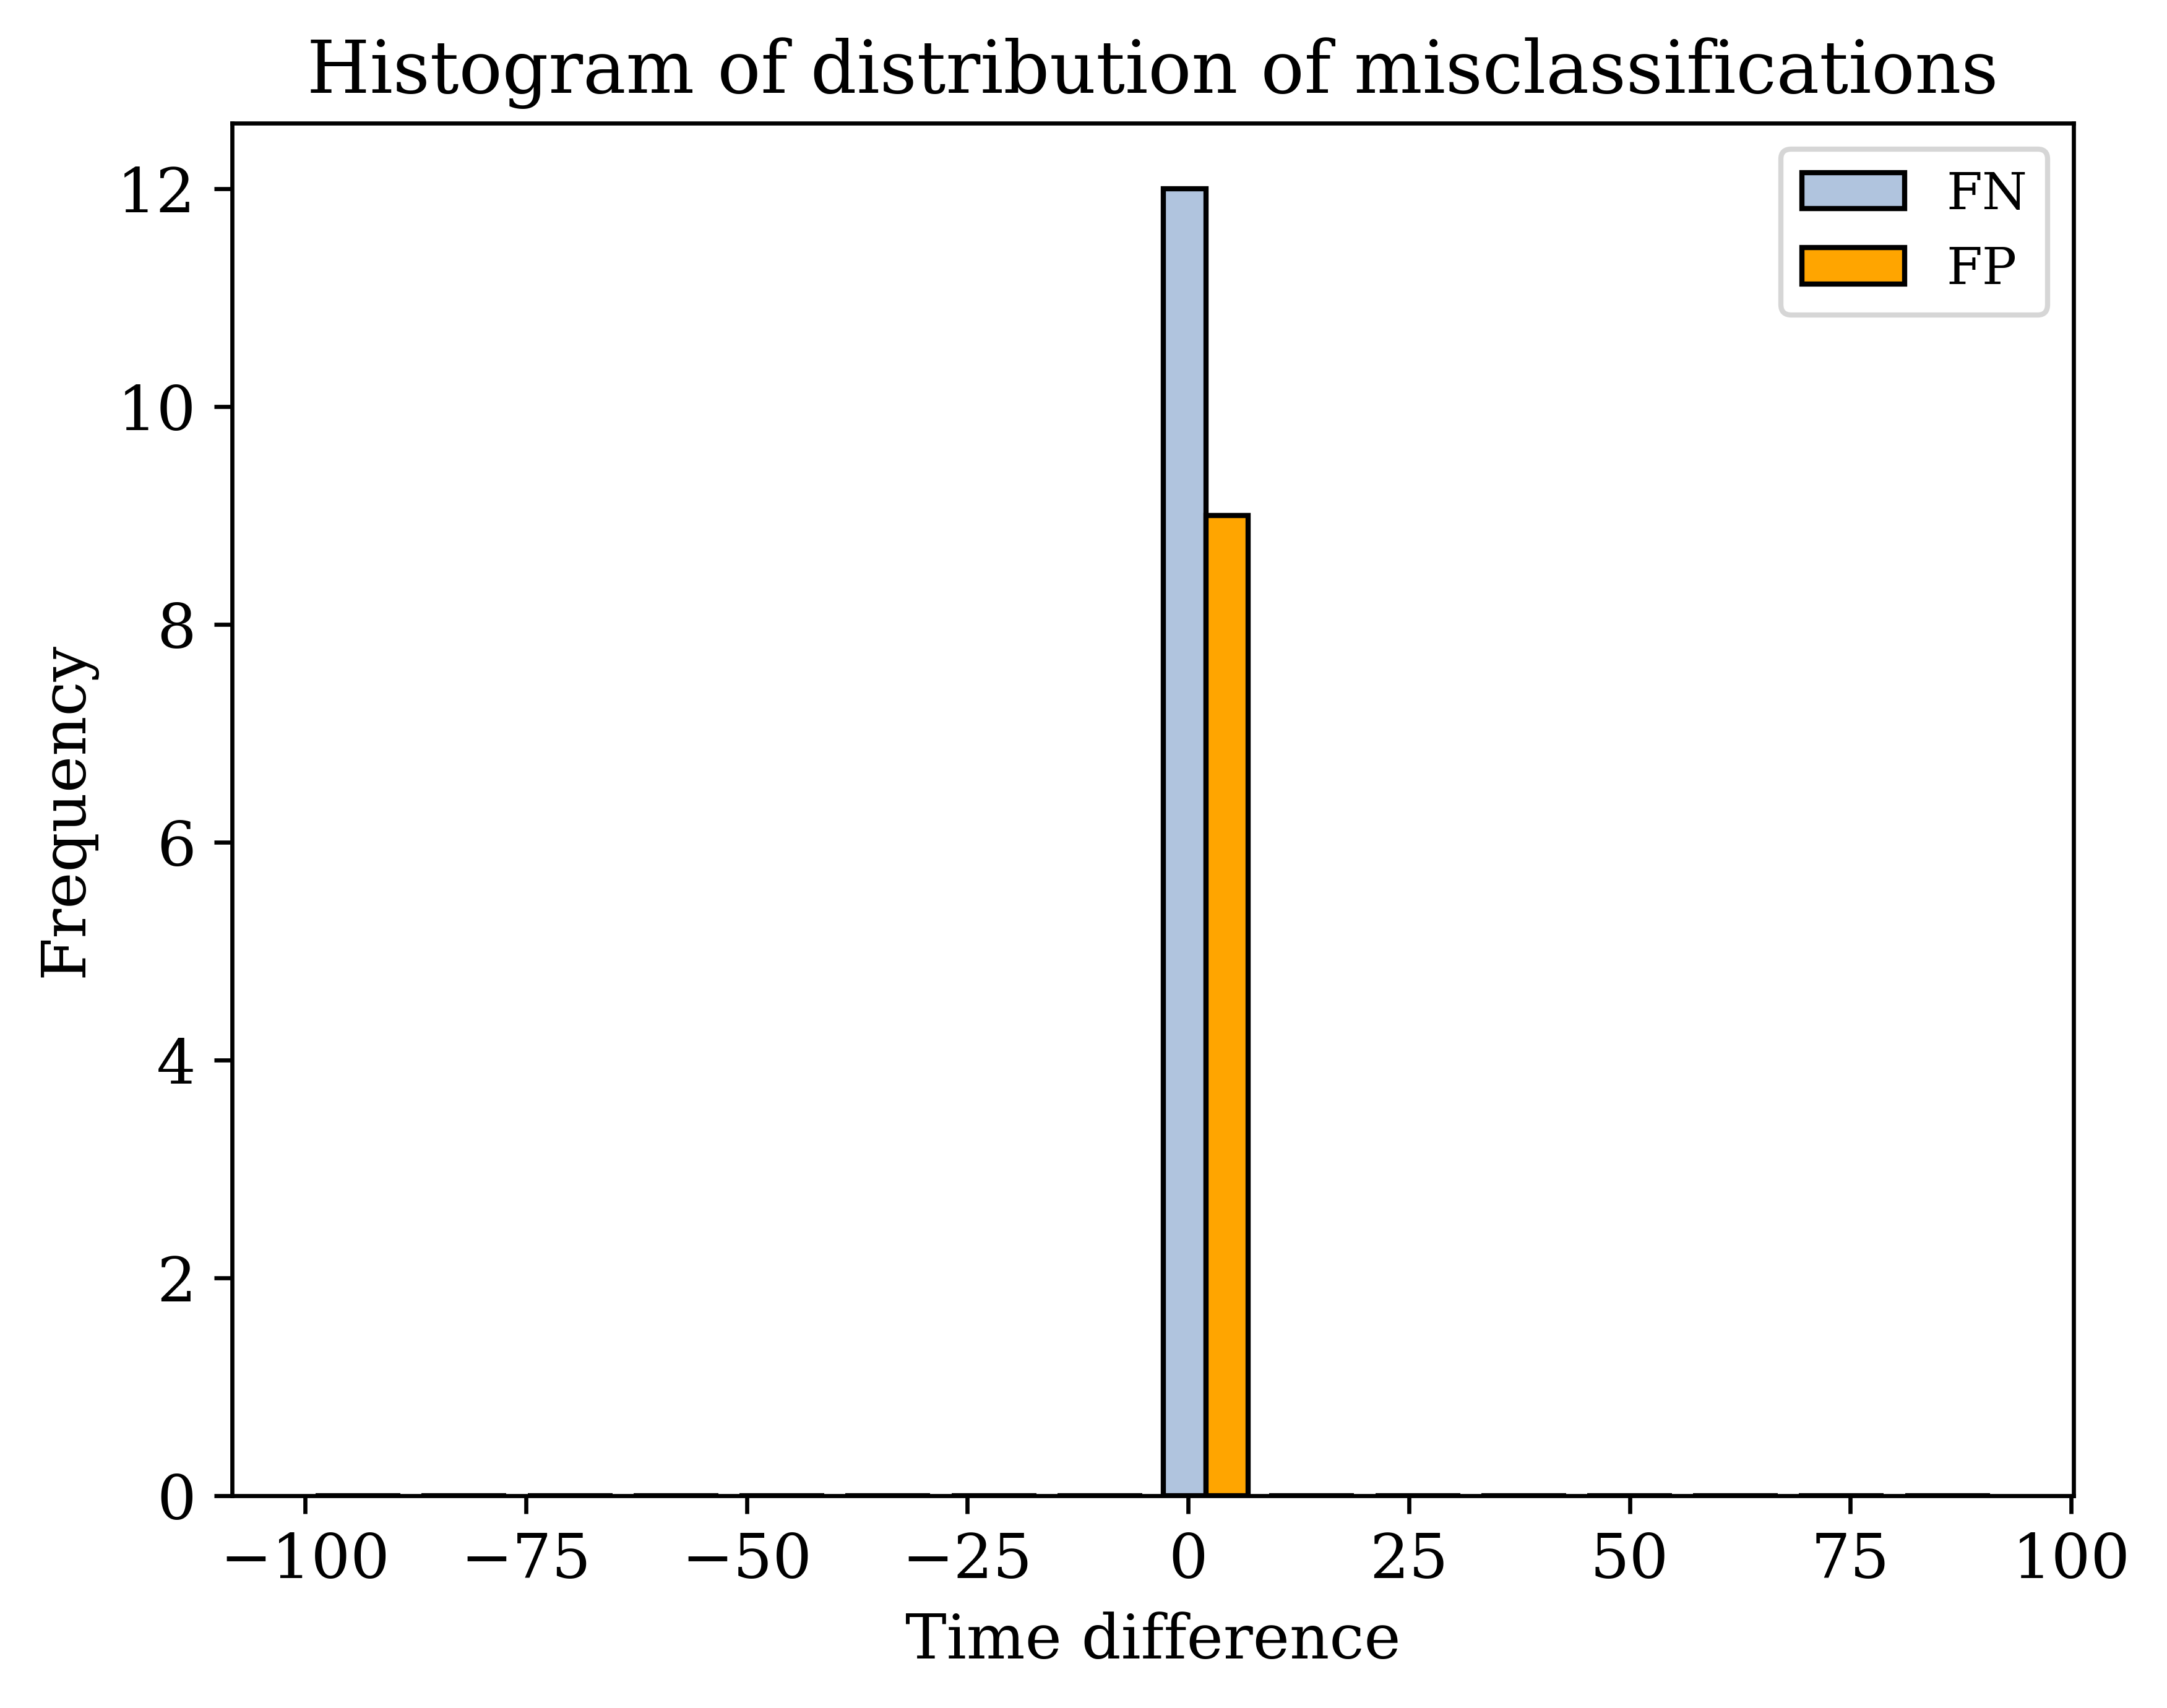

In [182]:
diff_0 = misclass[misclass['pred label'] == 0]['diff rewr-orig']
diff_1 = misclass[misclass['pred label'] == 1]['diff rewr-orig']

# Plotting the histogram
bins=list(range(-100, 101, 12))
plt.hist([diff_0, diff_1], bins=bins, edgecolor='black', color=['lightsteelblue', 'orange'], label=['FN', 'FP'])

# Adding labels and title
plt.xlabel('Time difference', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Histogram of distribution of misclassifications', fontsize = 14)
plt.legend(title='')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.savefig('plots/POS_extra_all_dec_tree_misclass_hist.png')
# Show the plot
plt.show()

In [183]:
bins = [0, 0.01, 0.1, 1, 10, 99.99, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']

misclass_1 = misclass[misclass["pred label"] == 1]
misclass_0 = misclass[misclass["pred label"] == 0]

misclass_1["cut"] = pd.cut(abs(misclass_1['diff rewr-orig']), bins=bins, labels=labels)
misclass_0["cut"] = pd.cut(abs(misclass_0['diff rewr-orig']), bins=bins, labels=labels)

table_1 = misclass_1.groupby('cut').size().reset_index(name='count_1')
table_0 = misclass_0.groupby('cut').size().reset_index(name='count_0')

table = pd.merge(table_1, table_0, on='cut', how='outer')
table = table.set_index('cut').T
table.index = ['FP', 'FN']
table

/tmp/ipykernel_132/2371796600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclass_1["cut"] = pd.cut(abs(misclass_1['diff rewr-orig']), bins=bins, labels=labels)
/tmp/ipykernel_132/2371796600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclass_0["cut"] = pd.cut(abs(misclass_0['diff rewr-orig']), bins=bins, labels=labels)
/tmp/ipykernel_132/2371796600.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

cut  0.01  0.1  1  10  100  TO
FP      1    3  5   0    0   0
FN      4    6  2   0    0   0

#### Statistical tests

In [184]:
test_set = df.loc[X_test.index]
test_set.insert(0, 'true label', np.array(y1_test))
test_set.insert(0, 'pred label', y1_pred_dec_tree)

In [185]:
test_set['pred(med)'] = np.where(test_set['pred label'] == 0, test_set['orig(med)'], test_set['rewr(med)'])
test_set.head()

pred label  true label  bench                query orig/rewr(med)  \
880            0           0  STATS  103-015-augF2-full1           orig   
1445           0           0    JOB       3c-augF2-full2           orig   
2331           0           0  STATS        048-127-augA1           orig   
3041           1           1  STATS              108-060           rewr   
4129           1           0   LSQB             q1-augA4           orig   

      orig(med)  rewr(med)  0ma  #relations  #conditions  ...  \
880    2.972437   2.976476    0           3            7  ...   
1445   0.077444   3.781730    0           4            7  ...   
2331   0.108263   0.234819    1           5           11  ...   
3041   0.825061   0.252393    1           6            8  ...   
4129   8.830530   9.380234    1          10            9  ...   

      median(container counts)  q75(container counts)  min(branching factors)  \
880                        1.0                    1.0                       2   
1445                       1.0                    1.0                       3   
2331                       1.0                    1.0                       4   
3041                       1.0                    1.0                       1   
4129                       1.0                    1.0                       1   

      max(branching factors)  mean(branching factors)  \
880                        2                 2.000000   
1445                       3                 3.000000   
2331                       4                 4.000000   
3041                       4                 2.500000   
4129                       2                 1.285714   

      median(branching factors)  q25(branching factors)  \
880                         2.0                    2.00   
1445                        3.0                    3.00   
2331                        4.0                    4.00   
3041                        2.5                    1.75   
4129                        1.0                    1.00   

      q75(branching factors)  diff rewr-orig  pred(med)  
880                     2.00        0.004039   2.972437  
1445                    3.00        3.704286   0.077444  
2331                    4.00        0.126556   0.108263  
3041                    3.25       -0.572668   0.252393  
4129                    1.50        0.549704   9.380234  

[5 rows x 40 columns]

The Wilcoxon rank test is to compare medians (of dependent groups).  
The Nullhypothesis is that the medians are equal. If the p-value is smaller than a chosen alpha value, we can reject the null and say that the median with only original runtimes is significantly different to the median of the chosen versions.

In [186]:
w_stat, p_val = stats.wilcoxon(test_set["orig(med)"], test_set["pred(med)"])

print(f"Wilcoxon statistic: {w_stat}")
print(f"P-value: {p_val}")

Wilcoxon statistic: 267.0
P-value: 1.10982211877866e-28


The paired sample t-test is to compare means (of dependent groups).  
The Nullhypothesis is that the means are equal. If the p-value is smaller than a chosen alpha value, we can reject the null and say that the mean with only original runtimes is significantly different to the mean of the chosen versions.

In [187]:
t_stat, p_val = stats.ttest_rel(test_set["orig(med)"], test_set["pred(med)"])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 6.6271239310666195
P-value: 1.0030705111552835e-10


#### Important features using Gini importance

In [188]:
feature_names = X.columns.tolist()
feature_importances = clf.feature_importances_
df_importances = pd.DataFrame(data=feature_importances, index=feature_names, columns=["Importance"])
df_importances.T

0ma  #relations  #conditions  #filters    #joins  total cost  \
Importance  0.157076     0.00101     0.011528  0.022464  0.006379    0.053256   

            min(table rows)  max(table rows)  mean(table rows)  \
Importance         0.015989         0.020653          0.027379   

            q25(table rows)  ...  mean(container counts)  \
Importance         0.032397  ...                0.002011   

            q25(container counts)  median(container counts)  \
Importance                    0.0                       0.0   

            q75(container counts)  min(branching factors)  \
Importance                    0.0                0.000654   

            max(branching factors)  mean(branching factors)  \
Importance                0.008739                 0.004494   

            median(branching factors)  q25(branching factors)  \
Importance                   0.003609                0.001272   

            q75(branching factors)  
Importance                0.003637  

[1 rows x 31 columns]

In [189]:
df_importances_sorted = df_importances.sort_values(by='Importance', ascending=False)  # Use ascending=True for ascending order
df_importances_sorted

Importance
max(join rows)               0.368937
0ma                          0.157076
q75(table rows)              0.068742
total cost                   0.053256
min(join rows)               0.051066
q25(join rows)               0.044195
median(join rows)            0.032514
q25(table rows)              0.032397
q75(join rows)               0.030085
mean(table rows)             0.027379
#filters                     0.022464
max(table rows)              0.020653
min(table rows)              0.015989
median(table rows)           0.013403
mean(join rows)              0.013222
#conditions                  0.011528
max(branching factors)       0.008739
#joins                       0.006379
mean(branching factors)      0.004494
depth                        0.004230
q75(branching factors)       0.003637
median(branching factors)    0.003609
mean(container counts)       0.002011
q25(branching factors)       0.001272
max(container counts)        0.001060
#relations                   0.001010
min(branching factors)       0.000654
q25(container counts)        0.000000
median(container counts)     0.000000
q75(container counts)        0.000000
min(container counts)        0.000000

#### Visualization of the decision tree

In [190]:
clf.tree_.max_depth

19

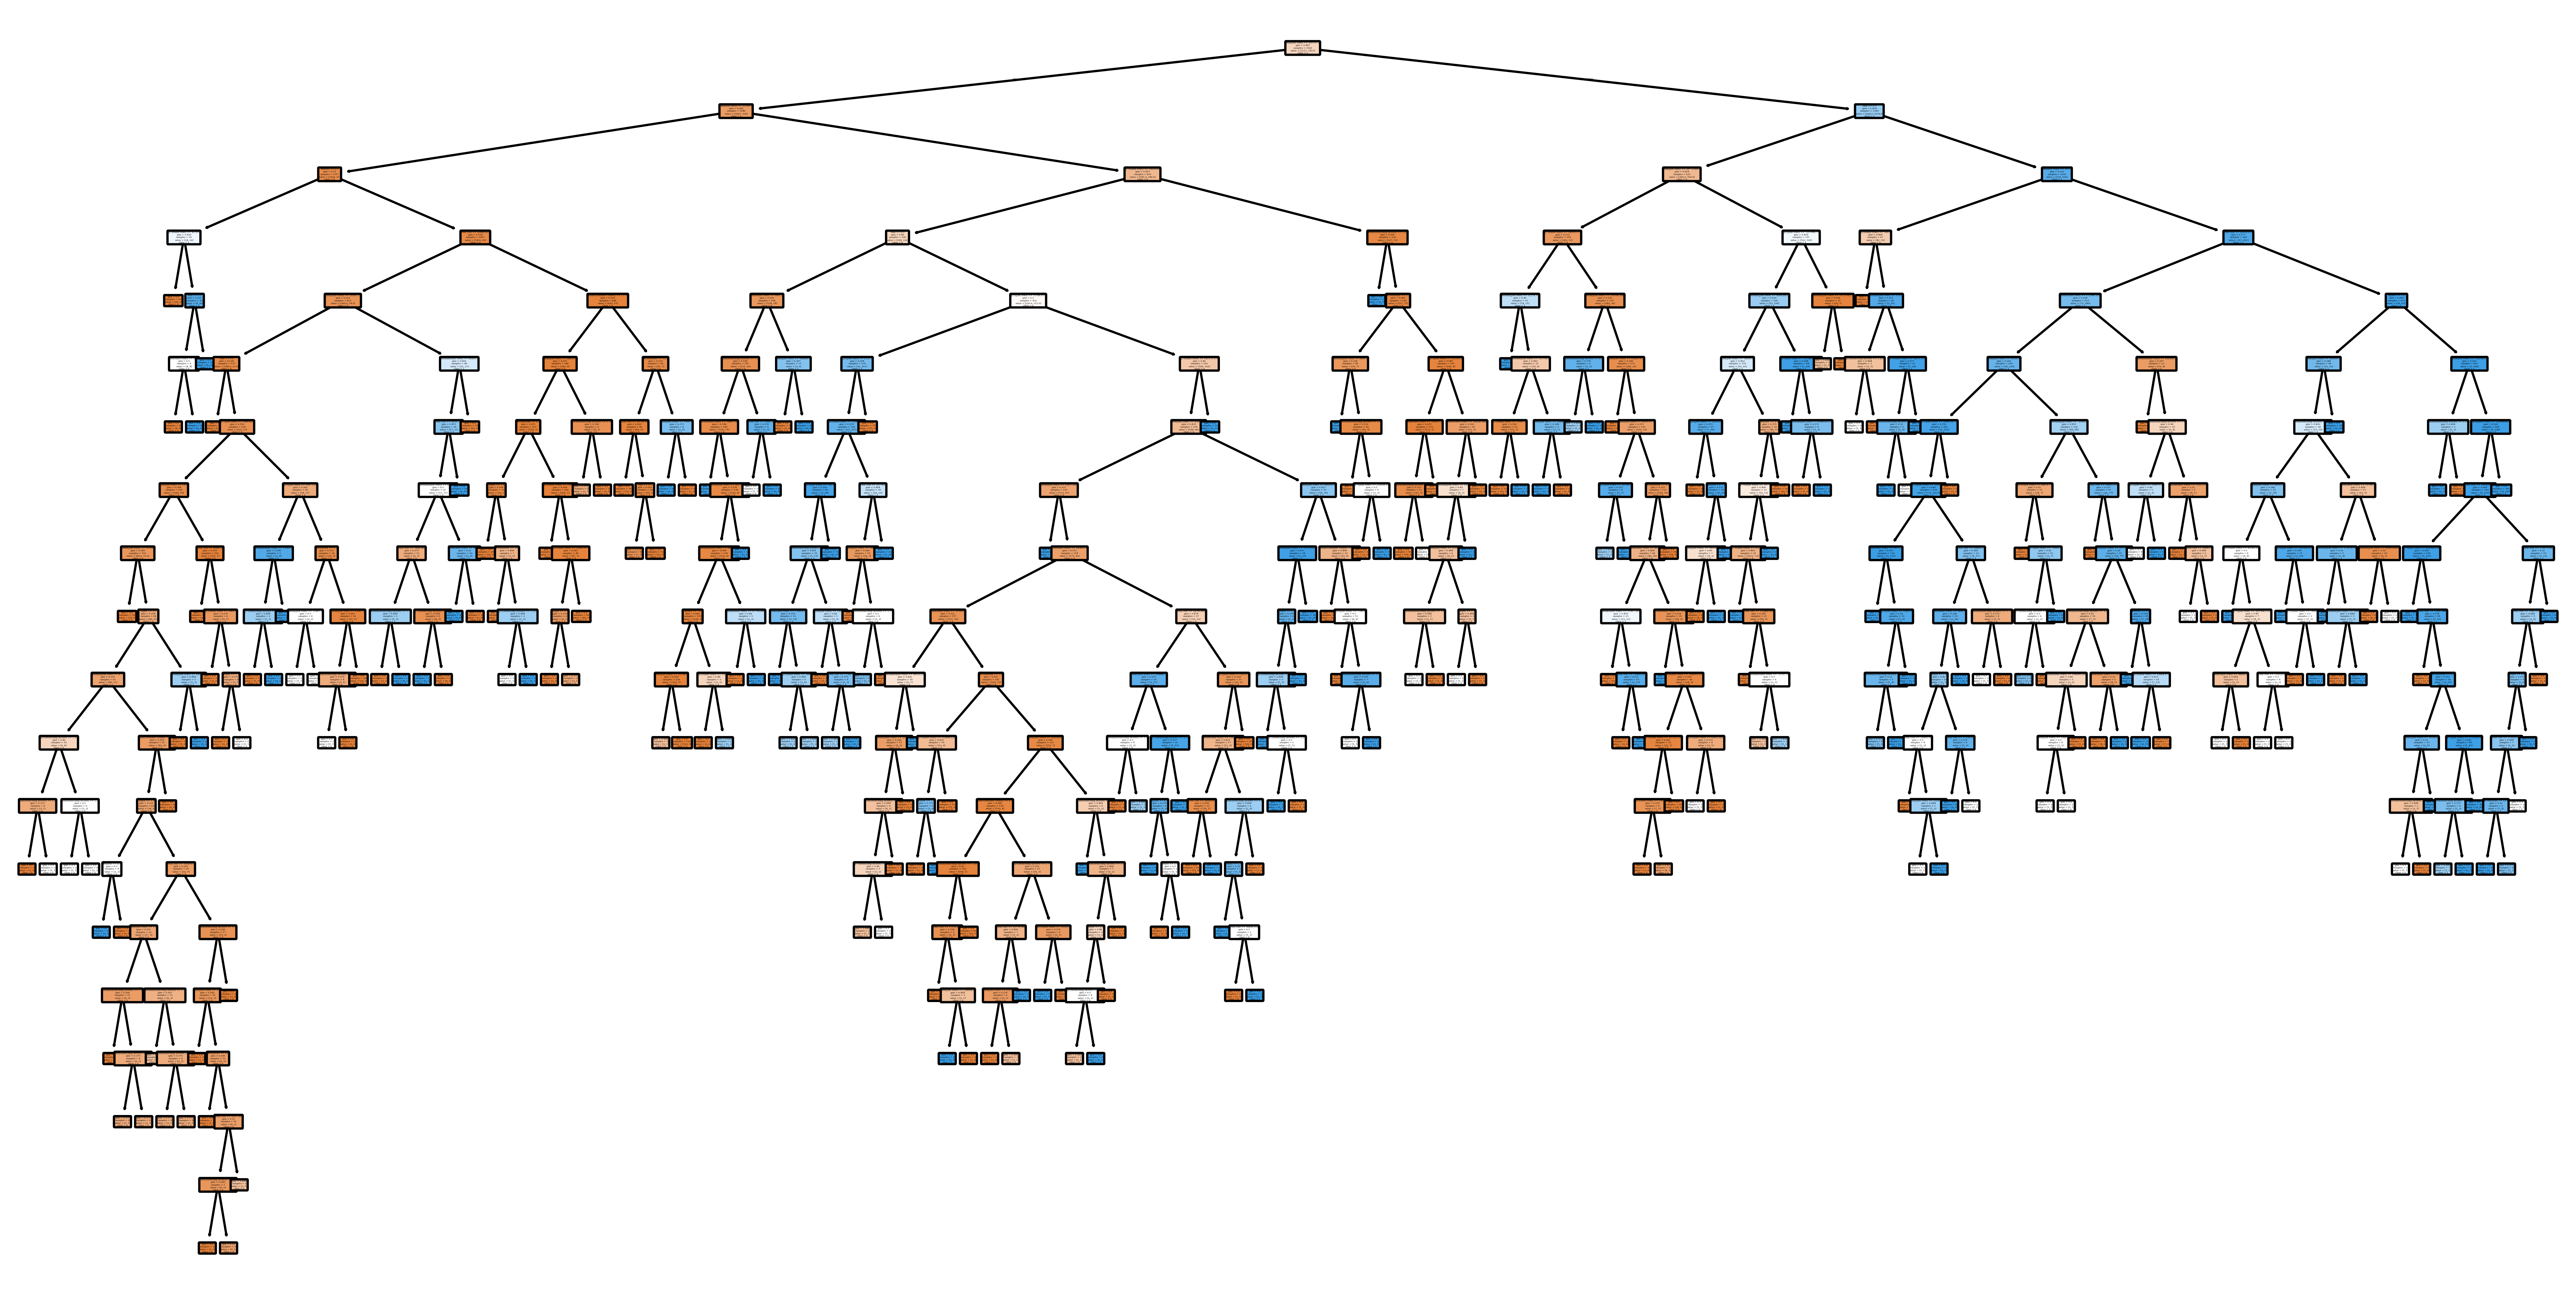

In [191]:
plt.figure(figsize=(20,10))  # Customize the size as needed
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0","1"], rounded=True)
plt.savefig('plots/POS_extra_all_dec_tree_vis.png')
plt.show()

#### Plots of the runtime distributions

Plots of the distribution of the orders of magnitude for the final model on the test set in comparison to the original and rewritten plots

/tmp/ipykernel_132/3308351617.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_orig = test_set.groupby(['interval orig', 'bench']).size().unstack(fill_value=0)
/tmp/ipykernel_132/3308351617.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rewr = test_set.groupby(['interval rewr', 'bench']).size().unstack(fill_value=0)
/tmp/ipykernel_132/3308351617.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

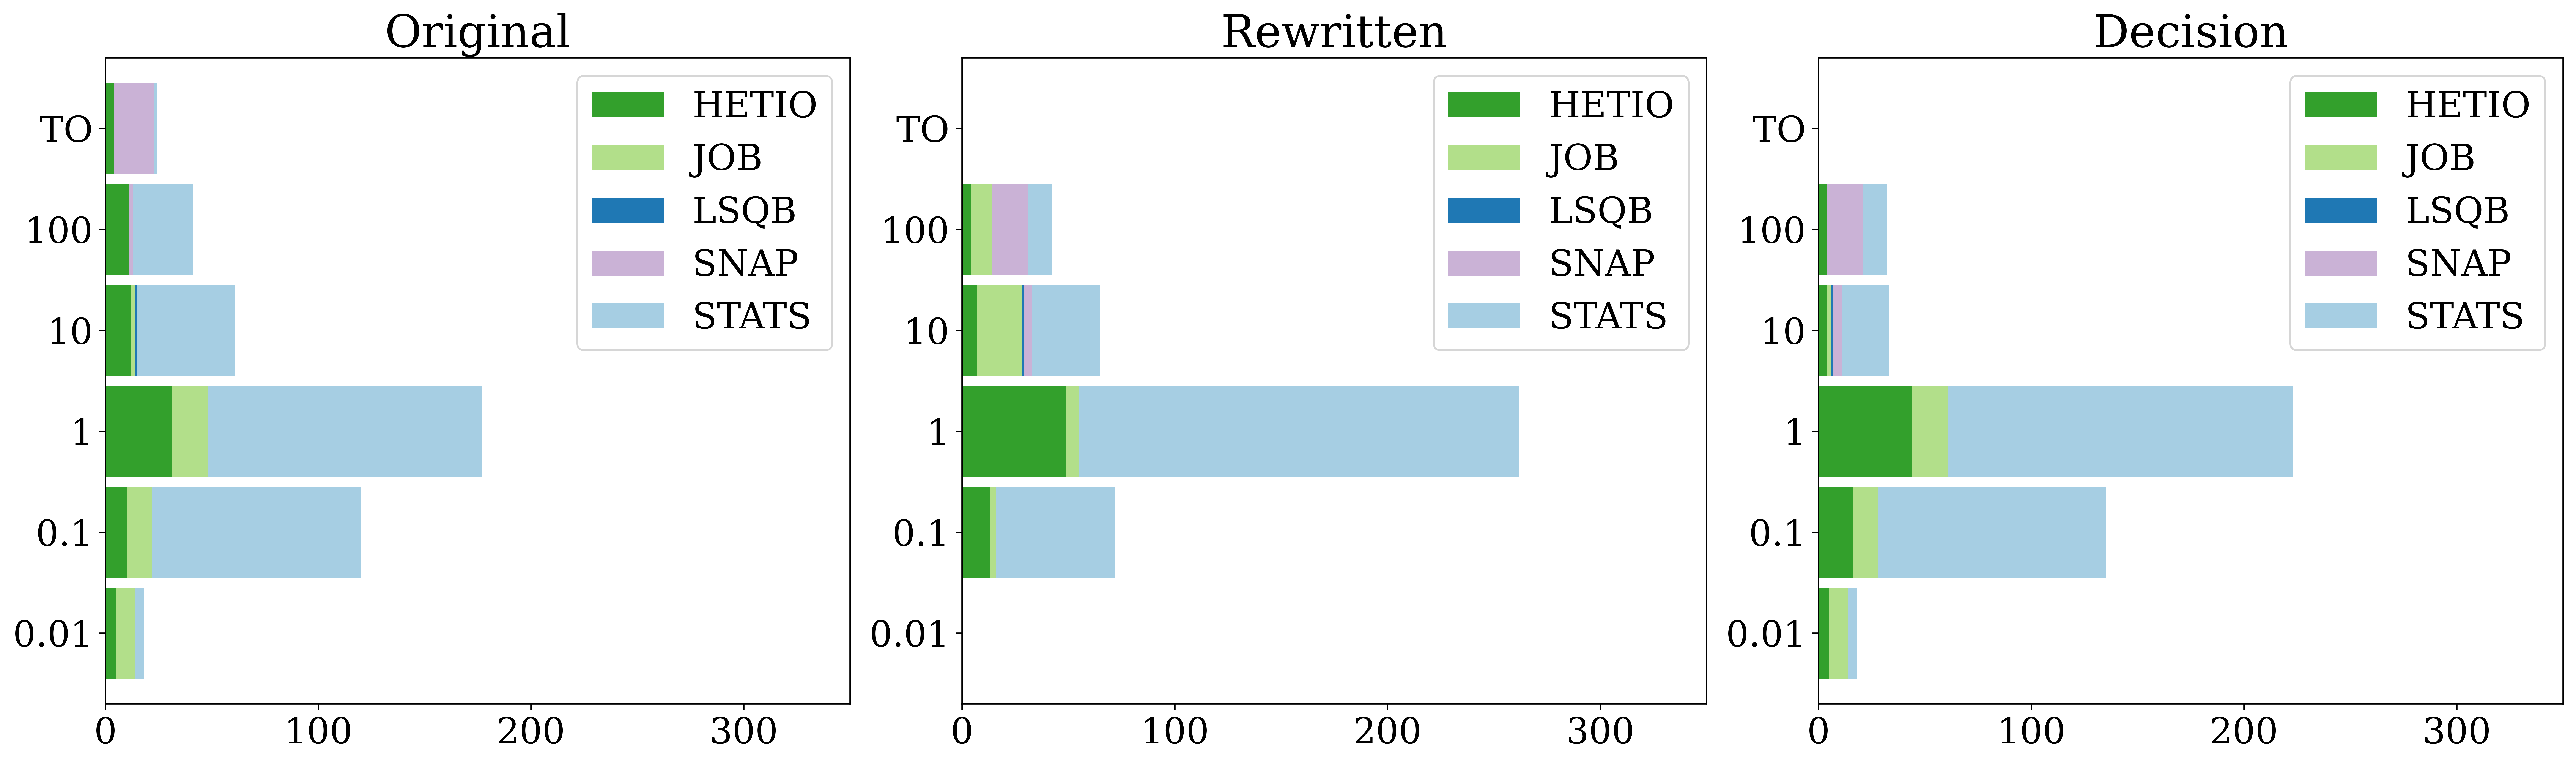

In [192]:
test_set["orig(med)"] = test_set['orig(med)'].astype("float64")
test_set["rewr(med)"] = test_set['rewr(med)'].astype("float64")
test_set["pred(med)"] = test_set['pred(med)'].astype("float64")
bins = [0, 0.01, 0.1, 1, 10, 99.99, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']
test_set['interval orig'] = pd.cut(test_set['orig(med)'], bins=bins, labels=labels)
test_set['interval rewr'] = pd.cut(test_set['rewr(med)'], bins=bins, labels=labels)
test_set['interval pred'] = pd.cut(test_set['pred(med)'], bins=bins, labels=labels)

grouped_orig = test_set.groupby(['interval orig', 'bench']).size().unstack(fill_value=0)
grouped_rewr = test_set.groupby(['interval rewr', 'bench']).size().unstack(fill_value=0)
grouped_pred = test_set.groupby(['interval pred', 'bench']).size().unstack(fill_value=0)

paired_colors = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c',
    '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
    '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'
]

category_colors = {
    'HETIO': paired_colors[3],
    'JOB': paired_colors[2],
    'LSQB': paired_colors[1],
    'SNAP': paired_colors[8],
    'STATS': paired_colors[0]
}

colors = [category_colors[col] for col in grouped_orig.columns]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

fontsize = 20
titlesize = 25
xlim = 350

# Plot for 'orig mean'
grouped_orig.plot(kind='barh', stacked=True, color=colors, ax=ax1, width = 0.9)
ax1.set_xlim(0,xlim)
#ax1.set_xlabel('Count', fontsize=fontsize)  # Increase font size for x-axis label
#ax1.set_ylabel('Order of magnitude', fontsize=fontsize)  # Increase font size for y-axis label
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Original', fontsize=titlesize)  # Increase font size for title
ax1.legend(fontsize=fontsize)  # Increase font size for legend
ax1.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'rewr mean'
grouped_rewr.plot(kind='barh', stacked=True, color=colors, ax=ax2, width = 0.9)
#ax2.set_xlabel('Count', fontsize=fontsize)
#ax2.set_ylabel('Order of magnitude', fontsize=fontsize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Rewritten', fontsize=titlesize)
ax2.legend(fontsize=fontsize)  
ax2.set_xlim(0,xlim)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'pred mean'
grouped_pred.plot(kind='barh', stacked=True, color=colors, ax=ax3, width = 0.9)
#ax3.set_xlabel('Count', fontsize=fontsize)
#ax3.set_ylabel('Order of magnitude', fontsize=fontsize)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Decision', fontsize=titlesize)
ax3.legend(fontsize=fontsize)  
ax3.set_xlim(0,xlim)
ax3.tick_params(axis='both', which='major', labelsize=fontsize)

plt.tight_layout()
plt.savefig('plots/POS_extra_all_runtimes_color_big.png')
plt.show()

/tmp/ipykernel_132/1266179795.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_orig = test_set.groupby(['interval orig', 'bench']).size().unstack(fill_value=0)
/tmp/ipykernel_132/1266179795.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rewr = test_set.groupby(['interval rewr', 'bench']).size().unstack(fill_value=0)
/tmp/ipykernel_132/1266179795.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

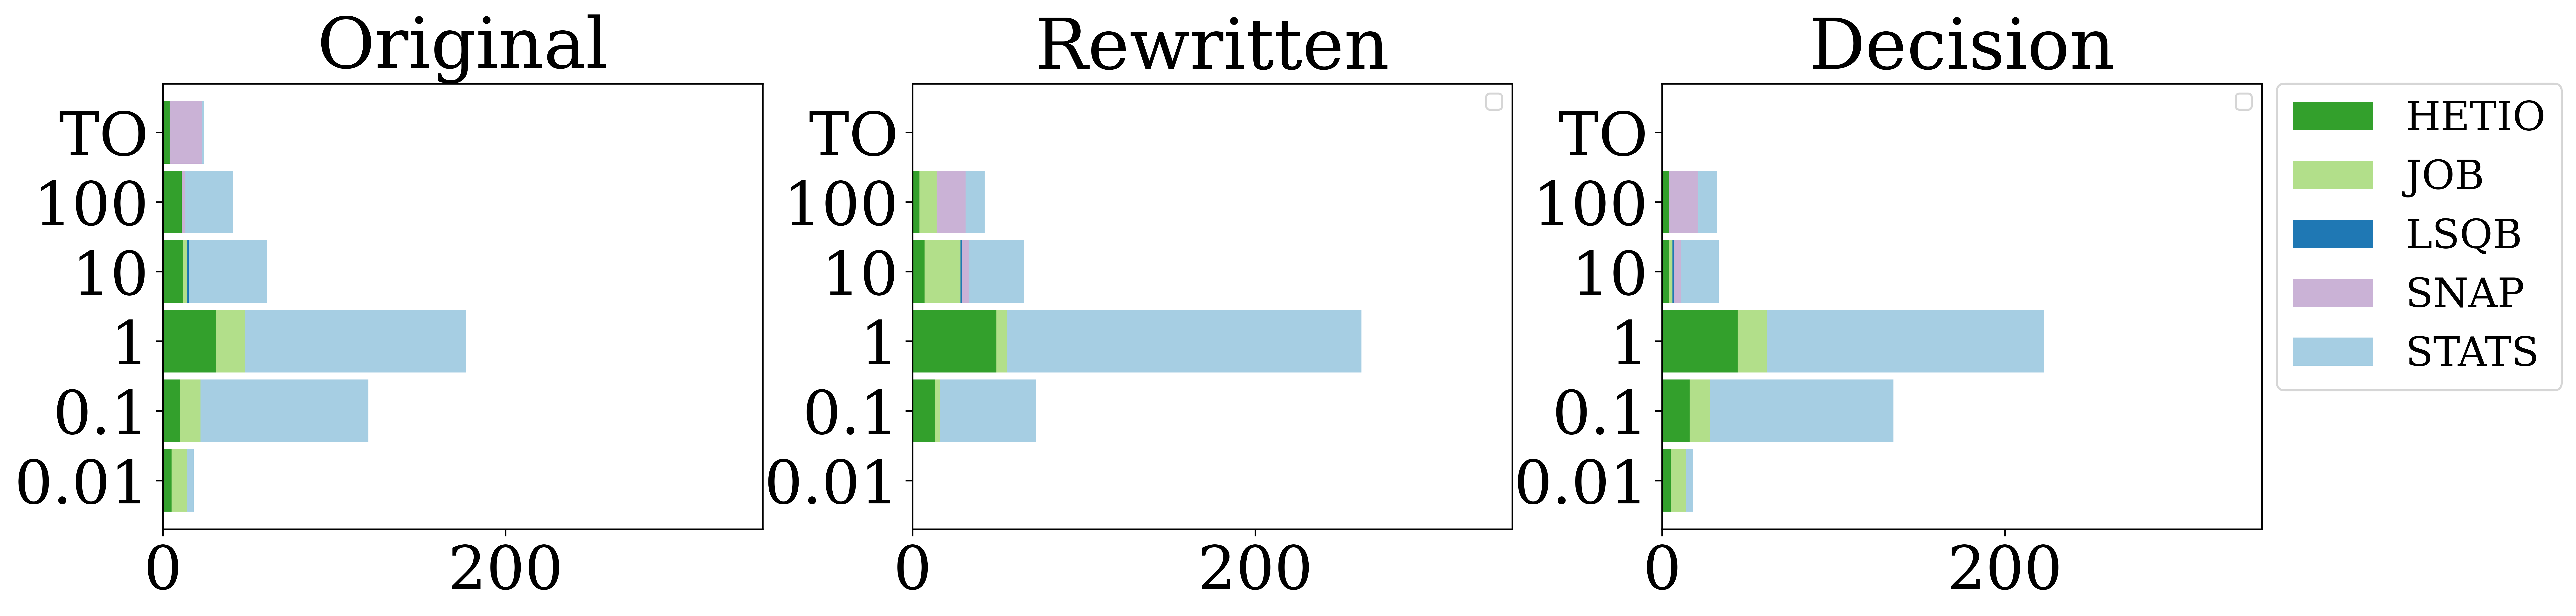

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming test_set is already defined and populated
test_set["orig(med)"] = test_set['orig(med)'].astype("float64")
test_set["rewr(med)"] = test_set['rewr(med)'].astype("float64")
test_set["pred(med)"] = test_set['pred(med)'].astype("float64")

bins = [0, 0.01, 0.1, 1, 10, 99.99, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']
test_set['interval orig'] = pd.cut(test_set['orig(med)'], bins=bins, labels=labels)
test_set['interval rewr'] = pd.cut(test_set['rewr(med)'], bins=bins, labels=labels)
test_set['interval pred'] = pd.cut(test_set['pred(med)'], bins=bins, labels=labels)

grouped_orig = test_set.groupby(['interval orig', 'bench']).size().unstack(fill_value=0)
grouped_rewr = test_set.groupby(['interval rewr', 'bench']).size().unstack(fill_value=0)
grouped_pred = test_set.groupby(['interval pred', 'bench']).size().unstack(fill_value=0)

paired_colors = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c',
    '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
    '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'
]

category_colors = {
    'HETIO': paired_colors[3],
    'JOB': paired_colors[2],
    'LSQB': paired_colors[1],
    'SNAP': paired_colors[8],
    'STATS': paired_colors[0]
}

colors = [category_colors[col] for col in grouped_orig.columns]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

fontsize = 30
titlesize = 35
xlim = 350

# Plot for 'orig mean'
grouped_orig.plot(kind='barh', stacked=True, color=colors, ax=ax1, width = 0.9)
ax1.set_xlim(0, xlim)
#ax1.set_xlabel('Count', fontsize=fontsize)  # Increase font size for x-axis label
#ax1.set_ylabel('Order of magnitude', fontsize=fontsize)  # Increase font size for y-axis label
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Original', fontsize=titlesize)
#ax1.legend(title='Benchmark', fontsize=fontsize)  # Removed individual legend for this subplot
ax1.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'rewr mean'
grouped_rewr.plot(kind='barh', stacked=True, color=colors, ax=ax2, width = 0.9)
ax2.set_xlabel('')
ax2.set_ylabel('')
#ax2.set_xlabel('Count', fontsize=fontsize)
#ax2.set_ylabel('Order of magnitude', fontsize=fontsize)
ax2.set_title('Rewritten', fontsize=titlesize)
#ax2.legend(title='Benchmark', fontsize=fontsize)  # Removed individual legend for this subplot
ax2.legend('')
ax2.set_xlim(0, xlim)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'pred mean'
grouped_pred.plot(kind='barh', stacked=True, color=colors, ax=ax3, width = 0.9)
ax3.set_xlabel('')
ax3.set_ylabel('')
#ax3.set_xlabel('Count', fontsize=fontsize)
#ax3.set_ylabel('Order of magnitude', fontsize=fontsize)
ax3.set_title('Decision', fontsize=titlesize)
#ax3.legend(title='Benchmark', fontsize=fontsize)  # Removed individual legend for this subplot
ax3.legend('')
ax3.set_xlim(0, xlim)
ax3.tick_params(axis='both', which='major', labelsize=fontsize)

# Add a combined legend outside the plots
handles, labels = ax1.get_legend_handles_labels()  # Use handles from the first subplot
ax1.legend(handles, labels, fontsize=20, loc='upper right', bbox_to_anchor=(4, 1), borderaxespad=0.)

# Adjust layout to make room for the legend
#plt.tight_layout()
plt.subplots_adjust(wspace = 0.25, right=0.85)  # Adjust this value to make room for the legend

plt.savefig('plots/POS_extra_all_runtimes_color.png') 
plt.show()


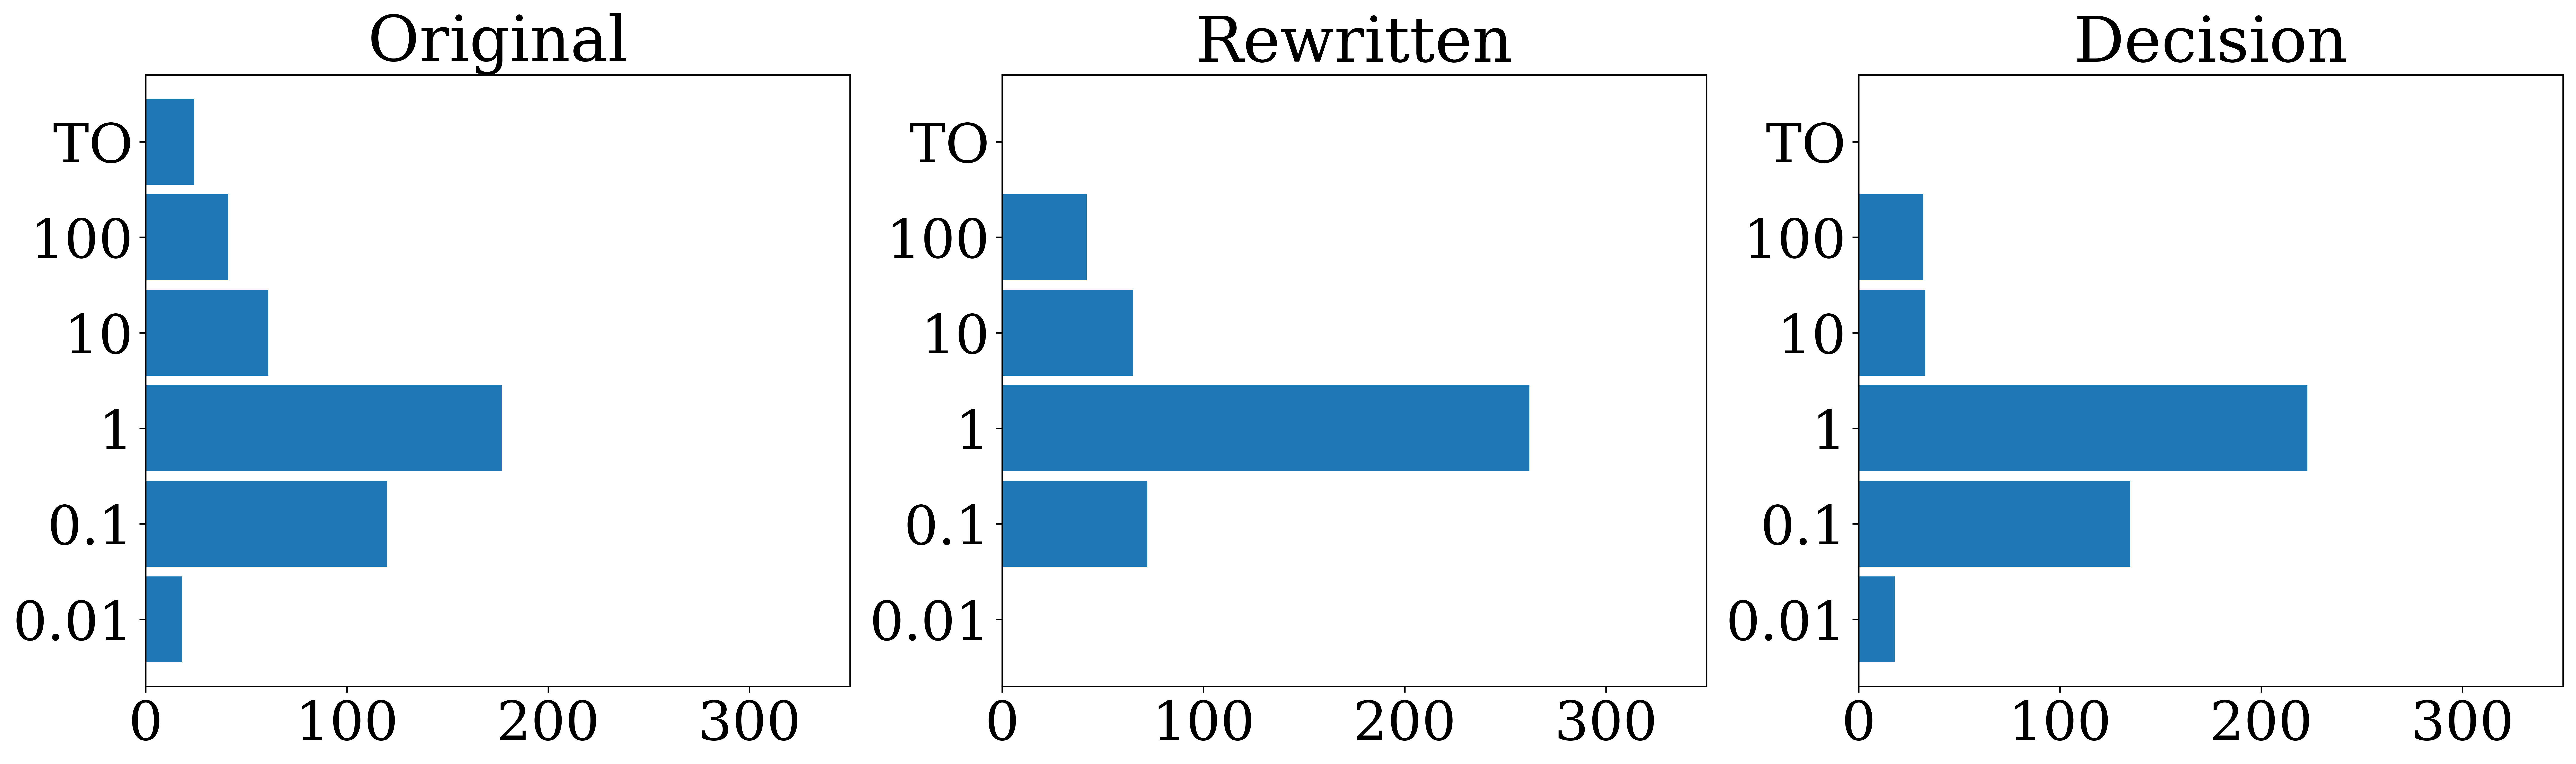

In [143]:
test_set["orig(med)"] = test_set['orig(med)'].astype("float64")
test_set["rewr(med)"] = test_set['rewr(med)'].astype("float64")
test_set["pred(med)"] = test_set['pred(med)'].astype("float64")
bins = [0, 0.01, 0.1, 1, 10, 99.99, float('inf')]
labels = ['0.01', '0.1', '1', '10', '100', 'TO']
test_set['interval orig'] = pd.cut(test_set['orig(med)'], bins=bins, labels=labels)
test_set['interval rewr'] = pd.cut(test_set['rewr(med)'], bins=bins, labels=labels)
test_set['interval pred'] = pd.cut(test_set['pred(med)'], bins=bins, labels=labels)

grouped_orig = test_set['interval orig'].value_counts().sort_index()
grouped_rewr = test_set['interval rewr'].value_counts().sort_index()
grouped_pred = test_set['interval pred'].value_counts().sort_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

fontsize = 30
titlesize = 35
xlim = 350

# Plot for 'orig mean'
grouped_orig.plot(kind='barh', stacked=True, ax=ax1, width = 0.9)
ax1.set_xlim(0,xlim)
#ax1.set_xlabel('Count', fontsize=fontsize)  # Increase font size for x-axis label
#ax1.set_ylabel('Order of magnitude', fontsize=fontsize)  # Increase font size for y-axis label
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Original', fontsize=titlesize)  # Increase font size for title
ax1.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'rewr mean'
grouped_rewr.plot(kind='barh', stacked=True, ax=ax2, width = 0.9)
#ax2.set_xlabel('Count', fontsize=fontsize)
#ax2.set_ylabel('Order of magnitude', fontsize=fontsize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Rewritten', fontsize=titlesize)
ax2.set_xlim(0,xlim)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)

# Plot for 'pred mean'
grouped_pred.plot(kind='barh', stacked=True, ax=ax3, width = 0.9)
#ax3.set_xlabel('Count', fontsize=fontsize)
#ax3.set_ylabel('Order of magnitude', fontsize=fontsize)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Decision', fontsize=titlesize)
ax3.set_xlim(0,xlim)
ax3.tick_params(axis='both', which='major', labelsize=fontsize)

plt.tight_layout()
plt.savefig('plots/POS_extra_all_runtimes.png')
plt.show()